In [1]:
# %load_ext lab_black

import numpy as np
from matplotlib import pyplot as plt

Generamos un dataset con $f(x) = -x^{2} + 4x$ y le añadimos ruido gaussiano.

In [2]:
n_samples = 150

f = lambda x: -(x**2) + 4 * x

x = np.random.uniform(low=0, high=4, size=n_samples)
y = f(x) + np.random.normal(0, 0.4, n_samples)

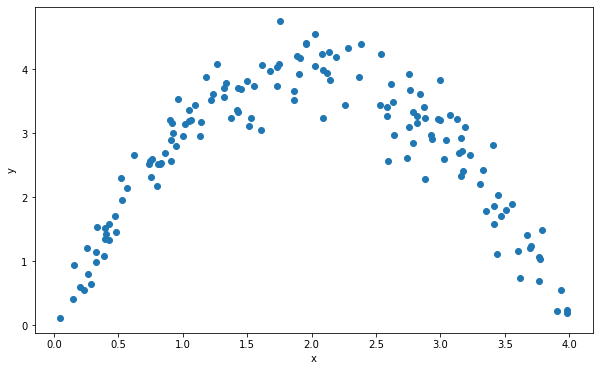

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Creamos un modelo que mediante backpropagation ajuste los pesos $w_{1}$, $w_{2}$ y $w_{3}$ según la función $w_{1}x^{2} + w_{2}x + w_{3}$

In [4]:
class CustomModel:
    def initializeParameters(self):
        W1, W2, W3 = np.random.rand(3)
        self.params = (W1, W2, W3)

    def fit(self, x, y, epochs, learning_rate):
        self.initializeParameters()

        history = []
        n = x.shape[0]

        for _ in range(epochs):
            for i in range(n):
                self.forwardPropagation(x[i], y[i])
                self.backwardPropagation(x[i], y[i], learning_rate)
            history.append(self.cost)

        return history

    def forwardPropagation(self, x, y):
        W1, W2, W3 = self.params
        self.y_hat = W1 * x**2 + W2 * x + W3
        self.cost = (y - self.y_hat) ** 2

    def backwardPropagation(self, x, y, learning_rate):
        W1, W2, W3 = self.params

        dy_hat = -2 * (y - self.y_hat)
        dW1 = dy_hat * x**2
        dW2 = dy_hat * x
        dW3 = dy_hat

        self.params = (
            W1 - learning_rate * dW1,
            W2 - learning_rate * dW2,
            W3 - learning_rate * dW3,
        )

    def predict(self, x):
        W1, W2, W3 = self.params
        return W1 * x**2 + W2 * x + W3

Probamos el modelo con puntos equidistantes en el intervalo $[0, 4]$

In [5]:
custom_model = CustomModel()
history = custom_model.fit(x, y, 100, 0.001)

x_test = np.linspace(0, 4, 50)
y_pred = custom_model.predict(x_test)

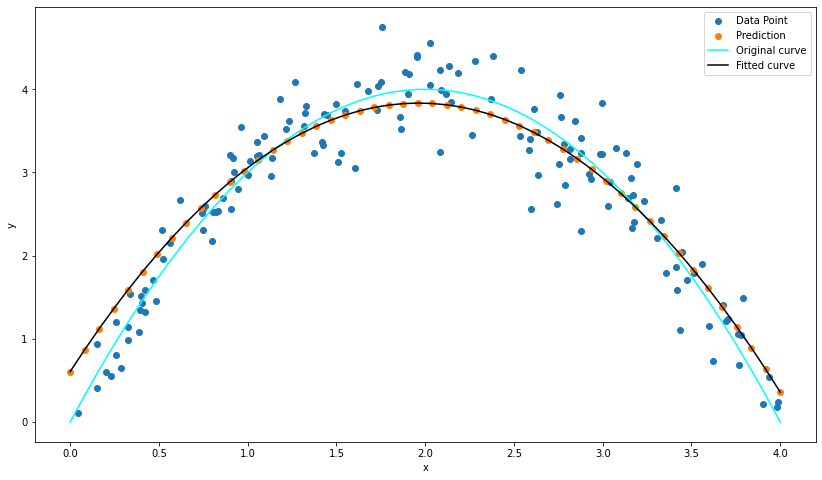

In [6]:
plt.figure(figsize=(14, 8))
plt.scatter(x, y, label="Data Point")
plt.scatter(x_test, y_pred, label="Prediction")
plt.plot(x_test, f(x_test), color="cyan", label="Original curve")
plt.plot(x_test, y_pred, color="k", label="Fitted curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()